# Tracking Changes to RietveldPhases

This notebook tracks changes as they're made to the RietveldPhases module/class.

In [8]:
import src.RietveldPhases
from src.RietveldPhases import RietveldPhases as Rp

In [9]:
Rp.set_profile(r"./data/profiles/Jade-Al2O3-Sim.xye",number_of_columns=2)

In [16]:
from cctbx.eltbx import wavelengths
d = {}
for w in wavelengths.characteristic_iterator():
   d[w.label()] = w.as_angstrom()
d

{'Ag': 0.5608000159263611,
 'AgA1': 0.5594099760055542,
 'AgA2': 0.5637999773025513,
 'Cr': 2.2908999919891357,
 'CrA1': 2.2897000312805176,
 'CrA2': 2.293610095977783,
 'Cu': 1.5418000221252441,
 'CuA1': 1.540560007095337,
 'CuA2': 1.5443899631500244,
 'Fe': 1.9372999668121338,
 'FeA1': 1.9360400438308716,
 'FeA2': 1.9399800300598145,
 'Mo': 0.7106999754905701,
 'MoA1': 0.7092999815940857,
 'MoA2': 0.7135900259017944}

In [112]:
cur = "CuA1"
print wavelengths.characteristic(cur)
d[cur]

1.540560007095337

In [26]:
El = ['Ag','Cu','Cr','Fe','Mo']
for e in El:
   print e +': '+ str((d[e]-d[e +'A1'])/(d[e+'A2']-d[e]))
for e in El:
   print e +': '+ str((1/d[e]-1/d[e +'A1'])/(1/d[e+'A2']-1/d[e]))

Ag: 0.46335260575
Cu: 0.478781183835
Cr: 0.44277293921
Fe: 0.47010942087
Mo: 0.484418503929
Ag: 0.466988791423
Cu: 0.479971472357
Cr: 0.44352905172
Fe: 0.471066128687
Mo: 0.487348402278


In [ ]:
Co-Ka1 wavelength=1.788965
Co-Ka2 wavelength=1.792850


(-1.294090271+3.28145766258j)
3.28145766258
8.96
0.001
20.0
33.79
27.88
[1.0, 1.25, 1.5, 2.0, 3.0, 4.0, 5.0, 6.0, 8.0, 10.0, 15.0, 20.0] [94707.20000000004, 61189.69654242449, 39585.28000000007, 19299.840000000022, 6709.247999999988, 3111.8080000000027, 1701.5040000000013, 1035.7759999999994, 470.8479999999994, 1934.4640000000013, 663.4879999999993, 302.75839999999994]
302.7584


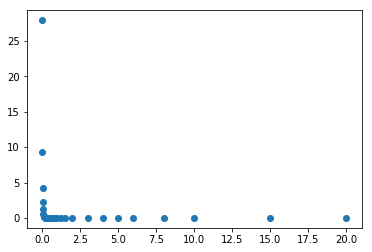

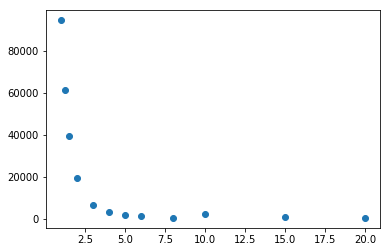

[0.001, 0.0010469500000000001, 0.0010961, 0.0010961, 0.0015, 0.002, 0.0030000000000000001, 0.0040000000000000001, 0.0050000000000000001, 0.0060000000000000001, 0.0080000000000000002, 0.0089788999999999997, 0.0089788999999999997, 0.01, 0.014999999999999999, 0.02, 0.029999999999999999, 0.040000000000000001, 0.050000000000000003, 0.059999999999999998, 0.080000000000000002, 0.10000000000000001, 0.14999999999999999, 0.20000000000000001, 0.29999999999999999, 0.40000000000000002, 0.5, 0.59999999999999998, 0.80000000000000004, 1.0, 1.25, 1.5, 2.0, 3.0, 4.0, 5.0, 6.0, 8.0, 10.0, 15.0, 20.0] [-9999.0, -9999.0, -9999.0, -9999.0, -9999.0, -9999.0, -9999.0, -9999.0, -9999.0, -9999.0, -9999.0, -9999.0, -9999.0, 1.300879955291748, 2.437030553817749, 3.193390369415283, 4.837569713592529, 4.724856853485107, 5.724283218383789, 6.665384769439697, 8.035978317260742, 9.47810173034668, 12.128610610961914, 11.23802661895752, 8.433720588684082, 6.569825649261475, 5.189445495605469, 4.239529132843018, 2.978404

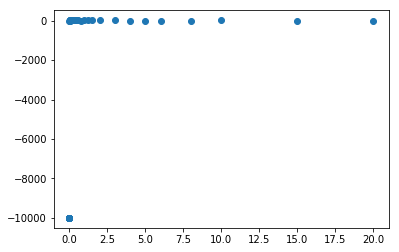

94707.20000000004

In [111]:
from cctbx.eltbx import attenuation_coefficient, henke
import matplotlib.pyplot as plt
table = attenuation_coefficient.get_table('Cu')
henke_table = henke.table('Cu')
print henke_table.at_kev(10).as_complex()
print henke_table.at_kev(10).fdp()
fdp = []
print table.density()
print table.min_energy()
print table.max_energy()
x = table.energy().as_numpy_array()
y = table.mu_en_rho().as_numpy_array()
print table.mu_rho_at_kev(20)
print table.mu_en_rho_at_kev(20)
es = []
mu = []
for e in x:
   try:
      mu.append(table.mu_at_kev(e))
      es.append(e)
   except RuntimeError:
      pass
print es,mu
print table.mu_at_kev(20)
# print y
plt.scatter(x[15:],y[15:])
# plt.scatter(x,y)
plt.show()
plt.scatter(es,mu)
plt.show()
es = []
for e in x:
   fdp.append(henke_table.at_kev(e).fdp())
   es.append(e)
#    except RuntimeError:
#       pass
print es,fdp
plt.scatter(es,fdp)
plt.show()
table.mu_at_kev(1)

In [ ]:
tmp = Rp("./data/cifs/1000032.cif")
print str(tmp.U)
print tmp.U.tobytes()
tmp.U.tobytes()

In [ ]:
Rp.set_bkgd_order(2)
assert Rp.bkgd.shape[0] == 2

In [ ]:
print Rp.two_theta

In [ ]:
print Rp.I

In [ ]:
print Rp.background_polynomial()
Rp.bkgd['values'][0] = 1
print Rp.background_polynomial()

In [ ]:
tmp.V

In [ ]:
import numpy as np
tmp2 = np.stack((tmp.U,tmp.V))

In [ ]:
tmp2['labels'][1] = 'S'
tmp2

In [ ]:
tmp.V = tmp2[1]
tmp.V

In [ ]:
Rp.assemble_global_x()
tmp.assemble_phase_x()
tmp.eta = tmp.set_eta_order(15)
tmp.assemble_phase_x()
tmp.phase_x[2]['values'] = .003
print tmp.phase_x[2]
tmp.update_params(tmp.phase_x)
tmp.W

In [ ]:
str(tmp.eta)

In [ ]:
Rp.bkgd
Rp.background_polynomial()

In [ ]:
tmp.set_lattice_parameters()
tmp.recompute_peak_positions = True
tmp.assemble_phase_x()
print tmp.crystal_system
tmp.phase_x[9]['values'] = 4.8
tmp.update_params(tmp.phase_x)
tmp.unit_cell.parameters()

In [ ]:
tmp.lattice_parameters[0]

In [ ]:
tmp.eta_polynomial()

In [ ]:
float(tmp.U['values'])

In [ ]:
np.max(tmp.phase_profile())

In [ ]:
import cProfile
 
pr = cProfile.Profile()
pr.enable()
 
tmp.phase_profile()
 
pr.disable()
 
pr.print_stats(sort='time')

In [ ]:
%matplotlib notebook
import matplotlib.pyplot as plt
tmp.recompute_peak_positions = True
tmp.phase_x[9]['values'] = 4.8
tmp.update_params(tmp.phase_x)
plt.plot(Rp.two_theta,tmp.phase_profile())
plt.show()

from guppy import hpy
h = hpy()
print h.heap().byrcs

In [ ]:
from guppy import hpy
h = hpy()
print h.heap().byrcs
# print h.heap().byclodo
print h.heap().byrcs[0].referrers.byrcs